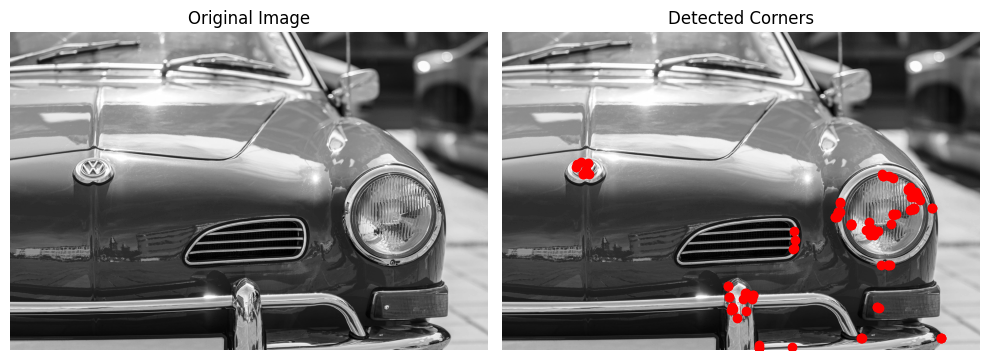

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'car.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to float32 for Harris corner detection
image_float32 = np.float32(image)

# Apply Harris corner detection
block_size = 2    # Neighborhood size for corner detection
ksize = 3         # Aperture parameter for Sobel operator
k = 0.04          # Harris detector free parameter (usually in the range [0.04, 0.06])
corners = cv2.cornerHarris(image_float32, block_size, ksize, k)

# Normalize and threshold the corner response
corners_norm = cv2.normalize(corners, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
threshold = 150  # Adjust this threshold value to control corner detection sensitivity
corners_thresholded = corners_norm > threshold

# Display the original image and detected corners
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image, cmap='gray')
plt.title('Detected Corners')
plt.axis('off')
plt.scatter(np.where(corners_thresholded)[1], np.where(corners_thresholded)[0], marker='o', color='red')

plt.tight_layout()
plt.show()
